<a href="https://colab.research.google.com/github/AbimaelLopez/Diplomado/blob/main/3_Iniciando_con_KNN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3 Iniciando con KNN<br>**

### Objetivo
Que la o el estudiante comprenda los elementos básicos que componen al algoritmo supervisado K-Nearest Neighbors para un problema de clasificación.

### Descripción del procedimiento a seguir
- Se carga el conjunto de datos "fewDataKNN" <br>
- Se define un punto nuevo al que se le desea predecir su clase.
- Se crea una función para graficar los puntos del dataset y el nuevo.
- Se crea una función para encontrar los vecinos más cercanos.
- Se define una función para hacer la predicción.
- Se utiliza una función de KNN de la biblioteca Sklearn y se comparan resultados.
- Se deja como ejercicio cambiar la distancia utilizada.

### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización <br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. https://pandas.pydata.org/
2. https://matplotlib.org/
3. https://scipy.org/

### **1. Importar bibliotecas**
Para esta práctica se presenta la biblioteca Scipy [https://scipy.org/] enfocada al aprendizaje automático en Python.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean   #Importamos la distancia Euclideana

### **2. Carga de datos**
- Leemos el archivo "fewDataKNN.csv"

Este es un conjunto de datos sintético que cuenta con 12 ejemplos bidimensionales $\{x_i,y_i,i=0,...,11\} $ que pertenecen a dos clases $\{C1,C2\}$.

<br>

NOTA: En este ejemplo, todo el DataFrame es nuestro conjunto de datos de entrenamiento. El dato de prueba lo generamos más adelante. Este es un ejemplo didáctico para entender el funcionamiento de KNN.

In [ ]:
df = pd.read_csv('/content/fewDataKNN.csv')
df

,x,y,Class
0,0.350135,0.605580,C1
1,0.376398,0.637072,C1
2,0.410869,0.597293,C1
3,0.302533,0.632099,C1
4,0.337004,0.690110,C1
5,0.479810,0.633757,C1
6,0.312382,0.598950,C2
7,0.335362,0.572431,C2
8,0.269704,0.602265,C2
9,0.381323,0.562486,C2


### **3. Creamos un dataframe con sólo un punto**
Queremos conocer a que clase pertenece este punto nuevo.

In [ ]:
# Create a new dataframe for the additional point
new_p = pd.DataFrame({'x': [0.375], 'y': [0.58]})

### **4. Graficamos los puntos del conjunto de datos y el punto nuevo**
Los puntos de cada clase se identifican con un color distinto.

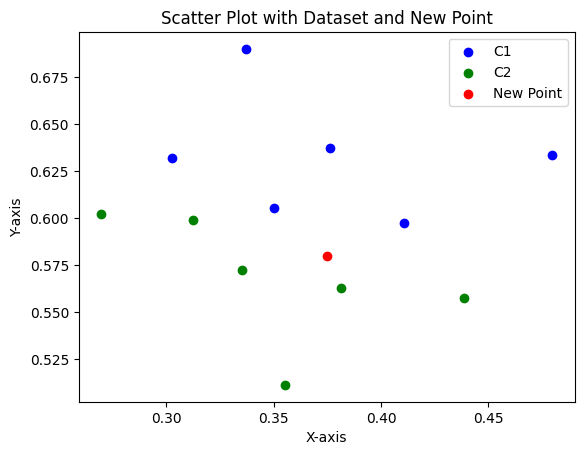

In [ ]:
def plotDSandNewPoint(df,new_p):
  fig = plt.figure()
  df_1 = df[df['Class']=='C1']
  df_2 = df[df['Class']=='C2']
  plt.scatter(df_1['x'],df_1['y'],c='blue',label='C1')
  plt.scatter(df_2['x'],df_2['y'],c='green',label='C2')
  plt.scatter(new_p['x'],new_p['y'],c='red', label='New Point')
  # Add labels and title
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Scatter Plot with Dataset and New Point')
  # Add legend
  plt.legend()
  # Show the plot
  plt.show()
  return fig

fig=plotDSandNewPoint(df,new_p)

### **5. Creamos la función *getKNearest()* para obtener los vecinos más cercanos**
Recibe: <br>
- df = El conjunto de datos
- new_p = El punto nuevo
- nn = Cantidad de vecinos más cercanos que se desean

Entrega: <br>
- sorted_indices: Un DataFrame que contiene a nn puntos más cercanos.

In [ ]:
def getKNearest(df,new_p,nn):
  distances = []

  point2 = (new_p.iloc[0,0], new_p.iloc[0,1])

  for i in range(len(df)):
    point1 = (df.iloc[i]['x'], df.iloc[i]['y'])
    distances.append(euclidean(point1, point2))

  sorted_indices = sorted(range(len(distances)), key=lambda k: distances[k])[:nn]
  return sorted_indices

closest = getKNearest(df,new_p,3)

In [ ]:
df.iloc[closest,:].head()

,x,y,Class
9,0.381323,0.562486,C2
0,0.350135,0.605580,C1
2,0.410869,0.597293,C1


### **6. Grafica con los puntos más cercanos**
Se define función para graficar los puntos del dataset, el punto nuevo y los nn vecinos más cercanos.

In [ ]:
def plotWithClosestPoints(df, new_p,closest):
  fig = plt.figure()
  df_1 = df[df['Class']=='C1']
  df_2 = df[df['Class']=='C2']
  plt.scatter(df_1['x'],df_1['y'],c='blue',label='C1')
  plt.scatter(df_2['x'],df_2['y'],c='green',label='C2')
  plt.scatter(new_p['x'],new_p['y'],c='red', label='New Point')
  plt.scatter(df.iloc[closest]['x'],df.iloc[closest]['y'],c='yellow',  marker='o', s=200,alpha=0.3, label='Closest points')

  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Scatter Plot with Dataset, New Point and closest to new point')

  plt.legend()

  plt.show()



### **7. Definimos y usamos la función *predictionKNN()* que combina lo que hemos hecho hasta el momento**
Recibe: <br>
- df = El conjunto de datos
- new_p = El punto nuevo
- nn = Cantidad de vecinos más cercanos que se desean

Entrega: <br>
- prediction: La clase predicha.

<br>

Usamos la función *getKNearest()* para encontrar los vecinos más cercanos.
Se utiliza la función *value_counts()* para contar la cantidad de elementos presente en cada clase de los vecinos más cercanos. Posteriormente se obtiene el nombre de la clase con la mayor cantidad de elementos con *idmax()*. Además, se grafica usando la función *plotWithClosestPoints()*.

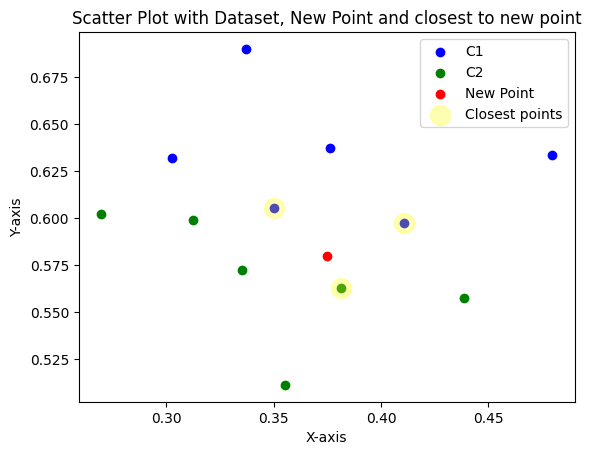

Se predice que el nuevo punto es:  C1


In [ ]:
def predictionKNN(df,new_p, nn):
  closest = getKNearest(df,new_p,nn)
  class_counts= df.iloc[closest]['Class'].value_counts()
  # Get the class with the maximum count
  prediction = class_counts.idxmax() #most_frequent_class
  plotWithClosestPoints(df, new_p,closest)
  print("Se predice que el nuevo punto es: ", prediction)
  return prediction

new_p = pd.DataFrame({'x': [0.375], 'y': [0.58]})
prediction = predictionKNN(df,new_p, 3)

### **8. Usamos el clasificador *KNeighborsClassifier* de la biblioteca Sklearn**
En la siguiente celda usamos un modelo de KNN incluído en Sklearn, podemos comparar los resultados con nuestra función. Tenemos que importar lo correspondiente (from sklearn.neighbors import KNeighborsClassifier)

Instanciamos un objeto en knn_classifier, indicando la cantidad de vecinos más cercanos en n_neighbors.

Ajustamos el modelo a los datos de entrenamiento usando *fit()*. Hacemos la predicción usando *predict()* .

NOTA: Recuerda que en este ejemplo didáctico, todo df es el conjunto de entrenamiento y el de prueba es el nuevo punto.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier   #Modelo de clasificación
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Aqui ajustamos el número de vecinos

# Ajustamos el modelo a los datos de entrenamiento
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

knn_classifier.fit(X, y)

pred = knn_classifier.predict(new_p)
print(pred)


['C1']


### **9. Ejercicio Probar otra distancia**
En este ejercicio, debes modificar nuestra función para cambiar la distancia Euclidiana por la distancia Coseno.
<br>
También en la función de Sklearn debes indicar que quieres usar la distancia coseno.


**9.1 Modificando nuestra función**

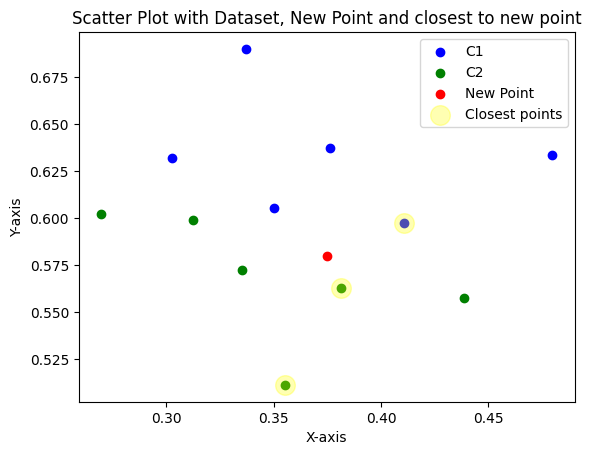

The new point is predicted to be:  C2


In [ ]:
# Investiga si debes importar algo
from scipy.spatial.distance import cosine


#Leemos de nuevo el dataset y definimos el nuevo punto (solo para recordar)

nn=3
df = pd.read_csv('/content/fewDataKNN.csv')
new_p = pd.DataFrame({'x': [0.375], 'y': [0.58]})

#Cambia el renglón en donde se indica
def getKNearest(df,new_p,nn):
  distances = []
  point2 = (new_p.iloc[0,0], new_p.iloc[0,1])

  for i in range(len(df)):
    point1 = (df.iloc[i]['x'], df.iloc[i]['y'])

    ##### Debes cambiar este renglón#######
    distances.append(cosine(point1, point2))

  sorted_indices = sorted(range(len(distances)), key=lambda k: distances[k])[:nn]
  return sorted_indices

closest = getKNearest(df,new_p,nn)

def predictionKNN(df,new_p, nn):
  closest = getKNearest(df,new_p,nn)
  class_counts= df.iloc[closest]['Class'].value_counts()
  # Get the class with the maximum count
  most_frequent_class = class_counts.idxmax()
  plotWithClosestPoints(df, new_p,closest)

  print("The new point is predicted to be: ", most_frequent_class)

predictionKNN(df,new_p, nn)

**Responde**
¿Qué cambia en los resultados al cambiar de distancia?

**9.2 Indicando la métrica en la función KNeighborsClassifier**

In [ ]:
#Agrega lo correspondiente
knn_classifier = KNeighborsClassifier(<Debes agregar algo>, n_neighbors=3)

# Ajustamos el modelo a los datos de entrenamiento
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

knn_classifier.fit(X, y)

pred = knn_classifier.predict(new_p)
print(pred)

['C2']


**Responde** <br>
¿Los resultados son iguales a los de nuestra función?